In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

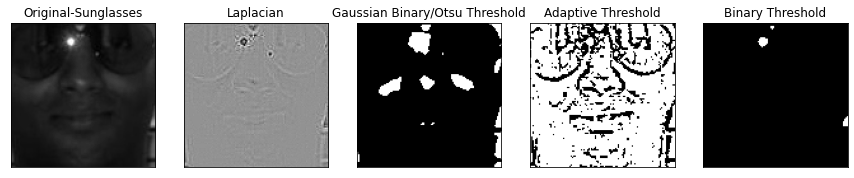

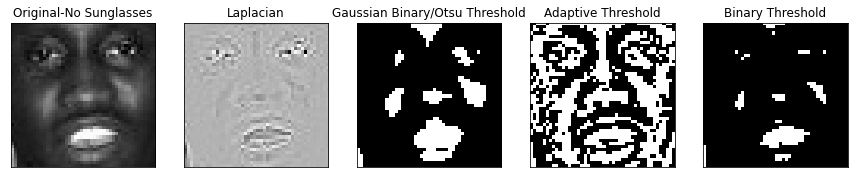

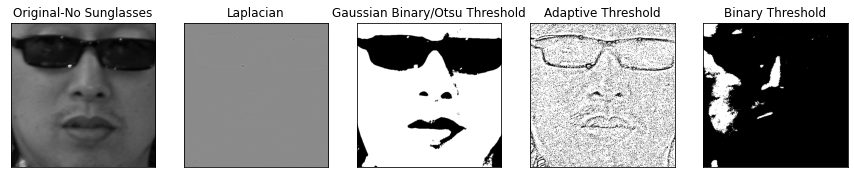

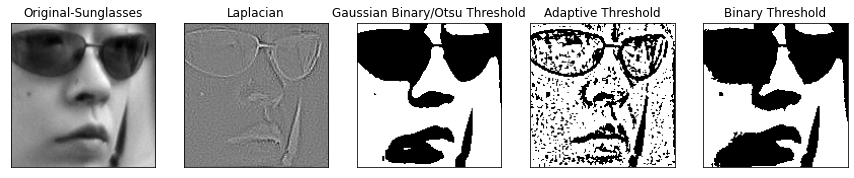

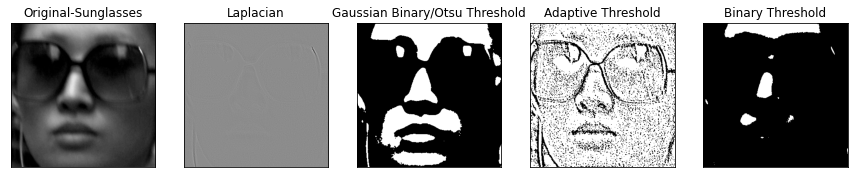

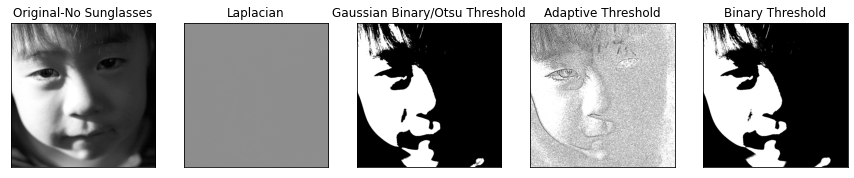

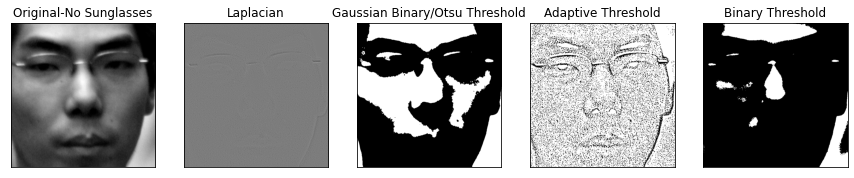

In [ ]:
class Gradient:
  def __init__(self, path):
    self.path = path

  def display(self):
    im = cv2.imread(self.path, 0)
    plt.imshow(im, cmap='gray')

  def read(self):
    im = cv2.imread(self.path, 0)
    return im

  def comparative_plot(self, threshold=120, number_of_filters=5, neighbourhood=5):
    if 'no' in self.path:
      label = 'No Sunglasses'
    else:
      label = 'Sunglasses'
    plt.figure(figsize=(3*number_of_filters,5*number_of_filters))
    im_original = cv2.imread(self.path, 0)
    laplacian = cv2.Laplacian(im_original,cv2.CV_64F)
    ret, thres_binary = cv2.threshold(im_original,threshold,255,cv2.THRESH_BINARY)
    thres_ada = cv2.adaptiveThreshold(im_original,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    ret, thres_gauss = cv2.threshold(cv2.GaussianBlur(im_original,(3,3),0),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #sobelx = cv2.Sobel(im_original,cv2.CV_64F,1,0,ksize=5)
    #sobely = cv2.Sobel(im_original,cv2.CV_64F,1,0,ksize=5)
    plt.subplot(1,number_of_filters,1),plt.imshow(im_original,cmap = 'gray')
    plt.title(f'Original-{label}'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,number_of_filters,2),plt.imshow(laplacian,cmap = 'gray')
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,number_of_filters,3),plt.imshow(thres_gauss,cmap = 'gray')
    plt.title('Gaussian Binary/Otsu Threshold'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,number_of_filters,4),plt.imshow(thres_ada,cmap = 'gray')
    plt.title('Adaptive Threshold'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,number_of_filters,5),plt.imshow(thres_binary,cmap = 'gray')
    plt.title('Binary Threshold'), plt.xticks([]), plt.yticks([])
    plt.show()

for path in glob.glob(os.path.join('drive/My Drive/test_filtres', '*.jpg')):
  Gradient(path).comparative_plot()

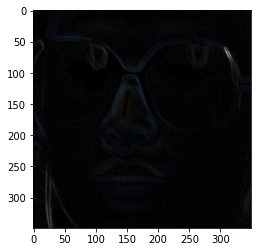

In [ ]:
im = cv2.imread(glob.glob(os.path.join('drive/My Drive/test_filtres', '*.jpg'))[4])
im = np.float32(im) / 255.0
 
# Calculate gradient
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

plt.imshow(mag, cmap='gray')